In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris

In [ ]:
country_names = ['Germany','Egypt', 'Ethiopia']
Years = [2005,2010,2015]

In [ ]:
labor1 = pd.read_excel("/content/Labor Force.xls")
labor = labor1[labor1['Country'].isin(country_names)]
labor.head()

,Region/Country/Area,Country,Year,Series,Value
1936,818,Egypt,2005,Labour force participation - Total,46.0
1937,818,Egypt,2005,Unemployment rate - Total,11.2
1938,818,Egypt,2005,Labour force participation - Male,71.5
1939,818,Egypt,2005,Unemployment rate - Male,7.3
1940,818,Egypt,2005,Labour force participation - Female,20.5


In [ ]:
population = pd.read_excel("/content/population_total.xlsx", index_col="country")
population.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,
Afghanistan,20.8M,21.6M,22.6M,23.7M,24.7M,25.7M,26.4M,27.1M,27.7M,28.4M,29.2M,30.1M,31.2M,32.3M,33.4M,34.4M
Angola,16.4M,16.9M,17.5M,18.1M,18.8M,19.4M,20.1M,20.9M,21.7M,22.5M,23.4M,24.2M,25.1M,26M,26.9M,27.9M
Albania,3.13M,3.13M,3.13M,3.12M,3.1M,3.09M,3.06M,3.03M,3M,2.97M,2.95M,2.93M,2.91M,2.9M,2.9M,2.89M
Andorra,65.4k,67.3k,70k,73.2k,76.3k,78.9k,81k,82.7k,83.9k,84.5k,84.5k,83.7k,82.4k,80.8k,79.2k,78k
United Arab Emirates,3.13M,3.3M,3.48M,3.71M,4.07M,4.59M,5.3M,6.17M,7.09M,7.92M,8.55M,8.95M,9.14M,9.2M,9.21M,9.26M


In [ ]:
education1 = pd.read_excel("/content/Enrolment in primary, secondary and tertiary education levels.xls")
education = education1[education1['Country'].isin(country_names)]
education.head()

,Region/Country/Area,Country,Year,Series,Value
2481,818,Egypt,2004,Students enrolled in primary education (thousa...,7928.0
2482,818,Egypt,2004,Gross enrollment ratio - Primary (male),97.2
2483,818,Egypt,2004,Gross enrollment ratio - Primary (female),94.1
2484,818,Egypt,2004,Gross enrollment ratio - Secondary (male),84.0
2485,818,Egypt,2004,Gross enrollment ratio - Secondary (female),79.6


In [ ]:
gdp1 = pd.read_excel("/content/gdp_total_yearly_growth (1).xlsx")
gdp = gdp1[gdp1['country'].isin(country_names)]
gdp.head()

,country,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
51,Germany,1.12,1.12,1.12,1.12,1.12,1.12,1.12,1.12,1.12,...,1.08,0.798,4.01,3.49,0.926,−4.87,4.04,2.89,0.44,-0.0344
58,Egypt,−0.0589,−0.0589,−0.0589,−0.0589,−0.0589,−0.0589,−0.0589,−0.0589,−0.0589,...,4.11,4.54,6.83,5.63,6.76,4.18,4.55,1.36,1.33,1.79
62,Ethiopia,0,0,0,0,0,0,0,0,0,...,13.1,11.3,10.3,10.9,10.3,8.28,12,10.8,8.26,9.41


In [ ]:
income1 = pd.read_excel("/content/income_per_person_gdppercapita_ppp_inflation_adjusted.xlsx")
income = income1[income1['country'].isin(country_names)]
income.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
44,Germany,1830,1830,1830,1830,1830,1830,1830,1830,1830,...,75.8k,77.5k,79.1k,80.8k,82.6k,84.4k,86.2k,88k,89.9k,91.9k
51,Egypt,1120,1120,1120,1120,1120,1120,1120,1120,1120,...,21.5k,21.9k,22.4k,22.9k,23.4k,23.9k,24.4k,24.9k,25.5k,26k
55,Ethiopia,592,592,592,592,592,592,592,592,592,...,4720,4820,4920,5030,5140,5250,5360,5480,5590,5710


QUESTION ONE STARTS HERE


In [ ]:
# Each Country's Education Dataframe
Germany = education[education['Country']=="Germany"]
Egypt = education[education['Country']=="Egypt"]
Ethiopia = education[education['Country']=="Ethiopia"]

In [ ]:
# FUNCTION TO GET EACH COUNTRY'S ENROLLEMENT
def get_UppSec_enrollment(df, Years):
    Wanted_Years = df[df['Year'].isin(Years)]
    upper_secondary = []
    for i in Wanted_Years.index:
        value = Wanted_Years.loc[i, 'Value']
        series = Wanted_Years.loc[i, 'Series']
        if series == "Students enrolled in upper secondary education (thousands)":
            upper_secondary.append(value)
    return np.array(upper_secondary)

countries = {"Germany": Germany, "Egypt": Egypt,"Ethiopia": Ethiopia}
results = {}

for country, df in countries.items():
    results[country] = get_UppSec_enrollment(df, Years)

Germany_UppSecondary = results["Germany"]
Egypt_UppSecondary = results["Egypt"]
Ethiopia_UppSecondary = results["Ethiopia"]

# Egypt's Education per Year (Egypt has a problem with the years)
Egypt_Years = Egypt[Egypt['Year'].isin([2004, 2010, 2014])]
Egypt_UppSecondary = []
for i in Egypt_Years.index:
    value = Egypt_Years.loc[i, 'Value']
    series = Egypt_Years.loc[i, 'Series']
    if series == "Students enrolled in upper secondary education (thousands)":
        Egypt_UppSecondary.append(value)
Egypt_UppSecondary = np.array(Egypt_UppSecondary)

print(Germany_UppSecondary)
print(Egypt_UppSecondary)
print(Ethiopia_UppSecondary)

[2837. 2747. 2570.]
[3694. 2372. 3394.]
[199. 597. 796.]


In [ ]:
Germany_UppSecondary_variance = np.var(Germany_UppSecondary)
Egypt_UppSecondary_variance = np.var(Egypt_UppSecondary)
Ethiopia_UppSecondary_variance = np.var(Ethiopia_UppSecondary)
print(Germany_UppSecondary_variance)
print(Egypt_UppSecondary_variance)
print(Ethiopia_UppSecondary_variance)

12302.0
320240.8888888889
61601.555555555555


In [ ]:
# FUNCTION TO GET EACH COUNTRY'S INCOME PER PERSON
def get_income(data, country, years):
    income_values = []
    for year in Years:
        value = data.loc[data['country'] == country, year].values[0]
        value_str = str(value)
        if value_str.endswith('k'):
            value = float(value_str[:-1]) * 1000
        elif value_str.endswith('M'):
            value = float(value_str[:-1]) * 1000000
        income_values.append(value)
    return np.array(income_values)

# Process income for Germany, Egypt, and Ethiopia
Germany_income = get_income(income, 'Germany', Years)
Egypt_income = get_income(income, 'Egypt', Years)
Ethiopia_income = get_income(income, 'Ethiopia', Years)

print("Germany Income:", Germany_income)
print("Egypt Income:", Egypt_income)
print("Ethiopia Income:", Ethiopia_income)

Germany Income: [43900. 47000. 51200.]
Egypt Income: [ 8400. 10300. 10600.]
Ethiopia Income: [ 862 1260 1780]


In [ ]:
Germany_income_variance = np.var(Germany_income)
Egypt_income_variance = np.var(Egypt_income)
Ethiopia_income_variance = np.var(Ethiopia_income)
print(Germany_income_variance)
print(Egypt_income_variance)
print(Ethiopia_income_variance)

8948888.888888888
948888.8888888889
141280.8888888889


In [ ]:
# Covariance of Income and Upper secondary enrollement for all countries
Germany_covariance_Enrollement_Income= np.cov(Germany_income,Germany_UppSecondary)
Egypt_covariance_Enrollement_Income= np.cov(Egypt_income,Egypt_UppSecondary)
Ethiopia_covariance_Enrollement_Income= np.cov(Ethiopia_income,Egypt_UppSecondary)
print("Germany_covariance_Enrollement_Income:", Germany_covariance_Enrollement_Income)
print("Egypt_covariance_Enrollement_Income:", Egypt_covariance_Enrollement_Income)
print("Ethiopia_covariance_Enrollement_Income:", Ethiopia_covariance_Enrollement_Income)

Germany_covariance_Enrollement_Income: [[13423333.33333333  -495250.        ]
 [ -495250.            18453.        ]]
Egypt_covariance_Enrollement_Income: [[1423333.33333333 -477533.33333333]
 [-477533.33333333  480361.33333333]]
Ethiopia_covariance_Enrollement_Income: [[211921.33333333 -45019.33333333]
 [-45019.33333333 480361.33333333]]


In [ ]:
# Correlation for Question 1
Q1_DATA = pd.DataFrame({
   'Country': ['Germany', 'Egypt', 'Ethiopia'],
   'Income': [Germany_income, Egypt_income, Ethiopia_income],
   'Upper_Secondary_Enrollment': [Germany_UppSecondary, Egypt_UppSecondary, Ethiopia_UppSecondary]
})
correlations = []
for country in Q1_DATA['Country']:
   income = Q1_DATA.loc[Q1_DATA['Country'] == country, 'Income'].values[0]
   enrollment = Q1_DATA.loc[Q1_DATA['Country'] == country, 'Upper_Secondary_Enrollment'].values[0]
   corr = np.corrcoef(income, enrollment)[0, 1]
   correlations.append(corr)


Q1_DATA['Correlation'] = correlations
print(Q1_DATA)

    Country                       Income Upper_Secondary_Enrollment  \
0   Germany  [43900.0, 47000.0, 51200.0]   [2837.0, 2747.0, 2570.0]   
1     Egypt   [8400.0, 10300.0, 10600.0]   [3694.0, 2372.0, 3394.0]   
2  Ethiopia            [862, 1260, 1780]      [199.0, 597.0, 796.0]   

   Correlation  
0    -0.995086  
1    -0.577519  
2     0.964645  


In [ ]:
#Summarization for some variables for Question 1
Germany_AVG_UppSec_Enrollement = Germany_UppSecondary.mean()
Egypt_AVG_UppSec_Enrollement = Egypt_UppSecondary.mean()
Ethiopia_AVG_UppSec_Enrollement = Ethiopia_UppSecondary.mean()
print("Germany_AVG_UppSec_Enrollement:", Germany_AVG_UppSec_Enrollement)
print("Egypt_AVG_UppSec_Enrollement:", Egypt_AVG_UppSec_Enrollement )
print("Ethiopia_AVG_UppSec_Enrollement:", Ethiopia_AVG_UppSec_Enrollement)
print("\n")
Germany_AVG_Income= Germany_income.mean()
Egypt_AVG_Income = Egypt_income.mean()
Ethiopia_AVG_Income = Ethiopia_income.mean()
print("Germany_AVG_Income:", Germany_AVG_Income)
print("Egypt_AVG_Income:", Egypt_AVG_Income )
print("Ethiopia_AVG_Income:", Ethiopia_AVG_Income)

Germany_AVG_UppSec_Enrollement: 2718.0
Egypt_AVG_UppSec_Enrollement: 3153.3333333333335
Ethiopia_AVG_UppSec_Enrollement: 530.6666666666666


Germany_AVG_Income: 47366.666666666664
Egypt_AVG_Income: 9766.666666666666
Ethiopia_AVG_Income: 1300.6666666666667


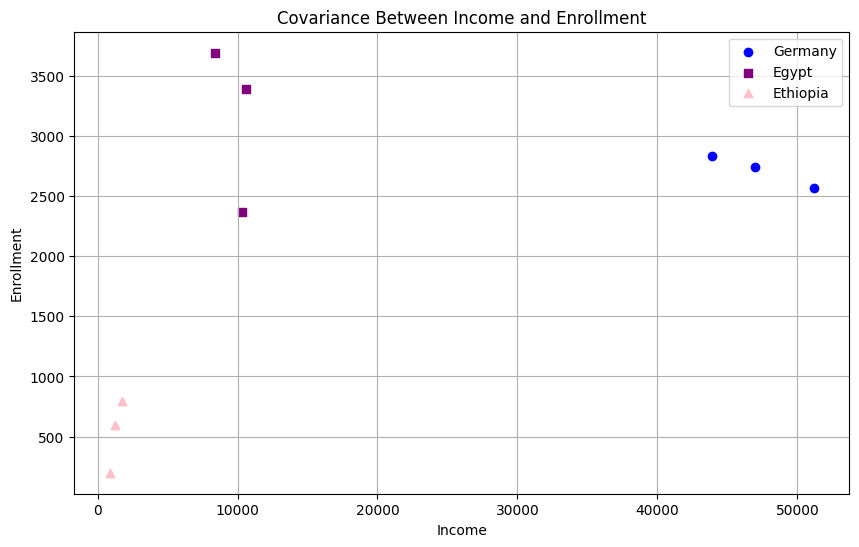

In [ ]:
def Covariance_Graph(x, y, CountryName, color, marker):
    plt.scatter(x, y, label=CountryName, color = color, marker = marker)
    plt.xlabel('Income')
    plt.ylabel('Enrollment')
    plt.title('Covariance Between Income and Enrollment')
    plt.grid(True)
plt.figure(figsize=(10, 6))
Covariance_Graph(Germany_income, Germany_UppSecondary, "Germany", "blue", 'o')
Covariance_Graph(Egypt_income, Egypt_UppSecondary, "Egypt", "purple", 's')
Covariance_Graph(Ethiopia_income, Ethiopia_UppSecondary, "Ethiopia", "pink",'^')
plt.legend()
plt.show()

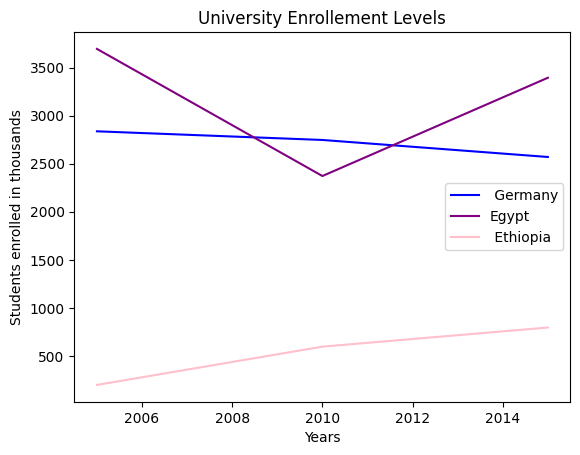

In [ ]:
plt.plot(Years, Germany_UppSecondary,  label=' Germany', color='blue')
plt.plot(Years, Egypt_UppSecondary,  label='Egypt', color='purple')
plt.plot(Years, Ethiopia_UppSecondary, label=' Ethiopia', color='pink')

plt.xlabel("Years")
plt.ylabel("Students enrolled in thousands")
plt.title("University Enrollement Levels")
plt.legend()
plt.show()

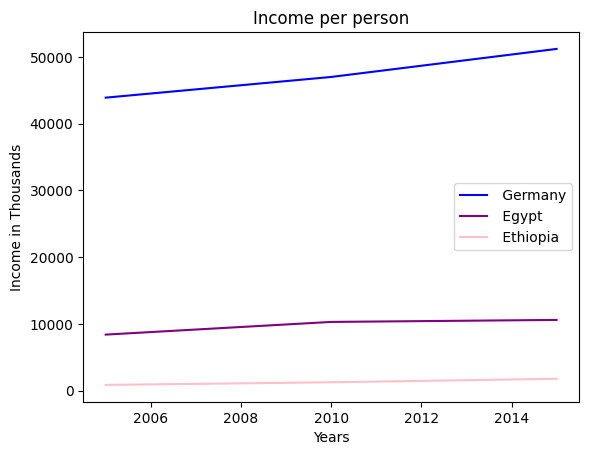

In [ ]:
plt.plot(Years, Germany_income, label=' Germany', color='blue')
plt.plot(Years, Egypt_income, label=' Egypt', color='purple')
plt.plot(Years, Ethiopia_income, label=' Ethiopia', color='pink')

plt.xlabel("Years")
plt.ylabel("Income in Thousands")
plt.title("Income per person")
plt.legend()
plt.show()

END OF QUESTION 1

QUESTION 2 STARTS HERE

In [ ]:
#Getting Total Unemployment Rate for Each Country
def get_unemployment_rate(data, country, years):
    unemployment_rate = []
    for year in years:
        value = data[(data['Country'] == country) &
                     (data['Series'] == "Unemployment rate - Total") &
                     (data['Year'] == year)]['Value'].values
        unemployment_rate.append(float(value[0]))

    return np.array(unemployment_rate)

Germany_Unemp = get_unemployment_rate(labor, "Germany", Years)
Egypt_Unemp = get_unemployment_rate(labor, "Egypt", Years)
Ethiopia_Unemp = get_unemployment_rate(labor, "Ethiopia", Years)

print("Germany Unemployment Rate:", Germany_Unemp)
print("Egypt Unemployment Rate:", Egypt_Unemp)
print("Ethiopia Unemployment Rate:", Ethiopia_Unemp)


Germany Unemployment Rate: [11.2  7.   4.6]
Egypt Unemployment Rate: [11.2  8.8 13.1]
Ethiopia Unemployment Rate: [2.5 2.3 2.3]


In [ ]:
Germany_Unemp_variance = np.var(Germany_Unemp)
Egypt_Unemp_variance = np.var(Egypt_Unemp)
Ethiopia_Unemp_variance = np.var(Ethiopia_Unemp)
print(Germany_Unemp_variance)
print(Egypt_Unemp_variance)
print(Ethiopia_Unemp_variance)

7.439999999999999
3.095555555555554
0.008888888888888906


In [ ]:
# Covariance of Unemployemnt and Upper secondary enrollement for all countries for question 2
Germany_covariance_Enrollement_Unemp= np.cov(Germany_Unemp,Germany_UppSecondary)
Egypt_covariance_Enrollement_Unemp= np.cov(Egypt_Unemp,Egypt_UppSecondary)
Ethiopia_covariance_Enrollement_Unemp= np.cov(Ethiopia_Unemp,Egypt_UppSecondary)
print("Germany_covariance_Enrollement_Unemp:", Germany_covariance_Enrollement_Unemp)
print("Egypt_covariance_Enrollement_Unemp:", Egypt_covariance_Enrollement_Unemp)
print("Ethiopia_covariance_Enrollement_Unemp:", Ethiopia_covariance_Enrollement_Unemp)

Germany_covariance_Enrollement_Unemp: [[1.1160e+01 4.2750e+02]
 [4.2750e+02 1.8453e+04]]
Egypt_covariance_Enrollement_Unemp: [[4.64333333e+00 1.16623333e+03]
 [1.16623333e+03 4.80361333e+05]]
Ethiopia_covariance_Enrollement_Unemp: [[1.33333333e-02 5.40666667e+01]
 [5.40666667e+01 4.80361333e+05]]


In [ ]:
#Correlation for Question 2 Part 1
Q2_P1_DATA = pd.DataFrame({
   'Country': ['Germany', 'Egypt', 'Ethiopia'],
   'Unemployment': [Germany_Unemp, Egypt_Unemp, Ethiopia_Unemp],
   'Upper_Secondary_Enrollment': [Germany_UppSecondary, Egypt_UppSecondary, Ethiopia_UppSecondary]
})
correlations = []
for country in Q2_P1_DATA['Country']:
   Unemployment = Q2_P1_DATA.loc[Q2_P1_DATA['Country'] == country, 'Unemployment'].values[0]
   enrollment = Q2_P1_DATA.loc[Q2_P1_DATA['Country'] == country, 'Upper_Secondary_Enrollment'].values[0]
   corr = np.corrcoef(income, Unemployment)[0, 1]
   correlations.append(corr)


Q2_P1_DATA['Correlation'] = correlations
print(Q2_P1_DATA)

    Country       Unemployment Upper_Secondary_Enrollment  Correlation
0   Germany   [11.2, 7.0, 4.6]   [2837.0, 2747.0, 2570.0]    -0.973035
1     Egypt  [11.2, 8.8, 13.1]   [3694.0, 2372.0, 3394.0]     0.508244
2  Ethiopia    [2.5, 2.3, 2.3]      [199.0, 597.0, 796.0]    -0.825236


In [ ]:
#Summarization for  variables for Question 2 Part 1(Note : Enrollment Summarization already calculated in Q1) (Note :Population plays a big role in averages)
Germany_AVG_Unemp= Germany_Unemp.mean()
Egypt_AVG_Unemp = Egypt_Unemp.mean()
Ethiopia_AVG_Unemp = Ethiopia_Unemp.mean()
print("Germany_AVG_Unemp:", Germany_AVG_Unemp)
print("Egypt_AVG_Unemp:", Egypt_AVG_Unemp )
print("Ethiopia_AVG_Unemp:", Ethiopia_AVG_Unemp)

Germany_AVG_Unemp: 7.599999999999999
Egypt_AVG_Unemp: 11.033333333333333
Ethiopia_AVG_Unemp: 2.3666666666666667


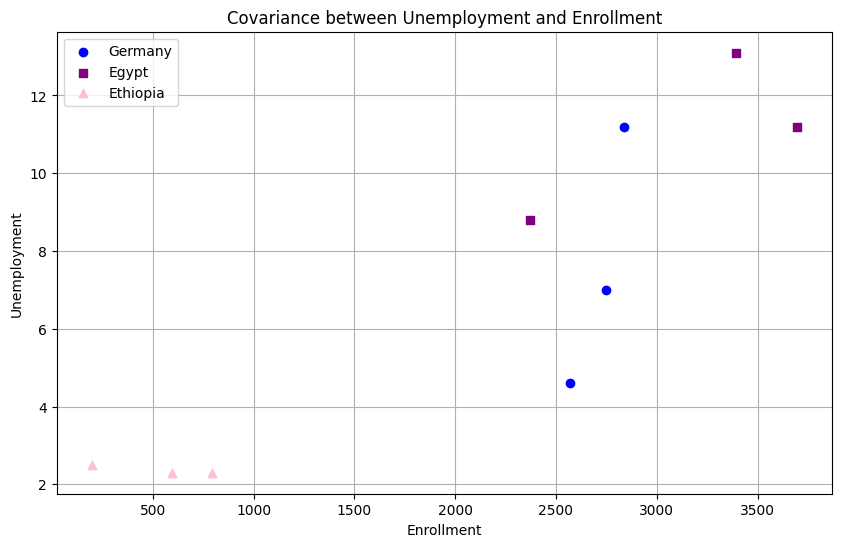

In [ ]:
def Covariance_Graph(x, y,CountryName, color, marker): #Something wrong with the graphs here
    plt.scatter(x, y, label = CountryName, color = color, marker = marker)
    plt.xlabel('Enrollment')
    plt.ylabel('Unemployment')
    plt.title('Covariance between Unemployment and Enrollment')
    plt.grid(True)

plt.figure(figsize=(10, 6))
Covariance_Graph(Germany_UppSecondary,Germany_Unemp, "Germany","blue",'o')
Covariance_Graph( Egypt_UppSecondary,Egypt_Unemp, "Egypt", "purple", 's')
Covariance_Graph( Ethiopia_UppSecondary,Ethiopia_Unemp, "Ethiopia", "pink", '^')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Unemployment Rates')

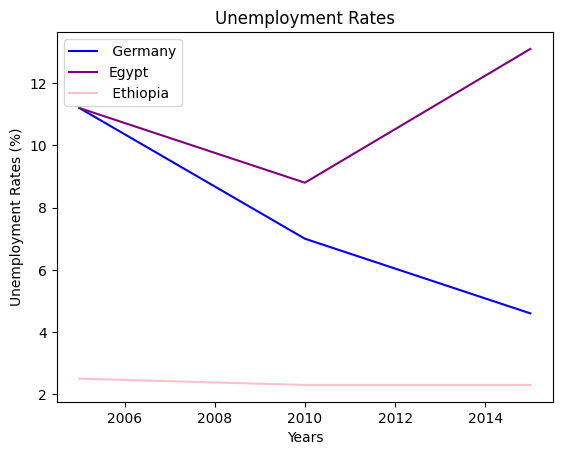

In [ ]:
#Necessary Graphs for Question 2, AVERGAES AFFECT GRAPH
plt.plot(Years, Germany_Unemp, label=' Germany', color='blue')
plt.plot(Years, Egypt_Unemp, label='Egypt', color='purple')
plt.plot(Years, Ethiopia_Unemp,label=' Ethiopia', color='pink')
plt.legend()
plt.xlabel("Years")
plt.ylabel("Unemployment Rates (%)")
plt.title("Unemployment Rates")

Question 2 Gender Analysis (Part 2)

In [ ]:
# Getting Male and Female enrollement in each country
def get_UppSec_enrollment_by_gender(data, Years, male, female):
    male_enrollment = []
    female_enrollment = []
    for Year in Years:
        male_value = data[(data['Series'] == male) & (data['Year'] == Year)]['Value'].values
        female_value = data[(data['Series'] == female) & (data['Year'] == Year)]['Value'].values
        if male_value.size == 0:
            previous_year = Year - 1
            male_value = data[(data['Series'] == male) & (data['Year'] == previous_year)]['Value'].values
        if male_value.size > 0:
            male_enrollment.append(float(male_value[0]))
        if female_value.size == 0:
            previous_year = Year - 1
            female_value = data[(data['Series'] == female) & (data['Year'] == previous_year)]['Value'].values
        if female_value.size > 0:
            female_enrollment.append(float(female_value[0]))
    return np.array(male_enrollment), np.array(female_enrollment)


male = 'Gross enrollment ratio - Upper secondary level (male)'
female = 'Gross enrollment ratio - Upper secondary level (female)'
Germany_UppSec_Male, Germany_UppSec_Female = get_UppSec_enrollment_by_gender(Germany, Years, male, female)
Egypt_UppSec_Male, Egypt_UppSec_Female = get_UppSec_enrollment_by_gender(Egypt, Years, male, female)
Ethiopia_UppSec_Male, Ethiopia_UppSec_Female = get_UppSec_enrollment_by_gender(Ethiopia, Years, male, female)

print("Germany Male Enrollment:", Germany_UppSec_Male)
print("Germany Female Enrollment:", Germany_UppSec_Female)
print("Egypt Male Enrollment:", Egypt_UppSec_Male)
print("Egypt Female Enrollment:", Egypt_UppSec_Female)
print("Ethiopia Male Enrollment:", Ethiopia_UppSec_Male)
print("Ethiopia Female Enrollment:", Ethiopia_UppSec_Female)


Germany Male Enrollment: [102.1 113.9 106.7]
Germany Female Enrollment: [ 95.9 100.8  96. ]
Egypt Male Enrollment: [73.2 49.7 68. ]
Egypt Female Enrollment: [70.5 46.6 66.5]
Ethiopia Male Enrollment: [ 7.8 19.1 17.7]
Ethiopia Female Enrollment: [ 5.2 13.4 17.4]


In [ ]:
Male_Total_Enrollement = [Germany_UppSec_Male,Egypt_UppSec_Male,Ethiopia_UppSec_Male]
Female_Total_Enrollement = [Germany_UppSec_Female,Egypt_UppSec_Female,Ethiopia_UppSec_Female]
Male_Total_Enrollement = np.array(Male_Total_Enrollement)
Female_Total_Enrollement = np.array(Female_Total_Enrollement)
print(Male_Total_Enrollement)
print(Female_Total_Enrollement)

[[102.1 113.9 106.7]
 [ 73.2  49.7  68. ]
 [  7.8  19.1  17.7]]
[[ 95.9 100.8  96. ]
 [ 70.5  46.6  66.5]
 [  5.2  13.4  17.4]]


In [ ]:
#Summarization for  variables for Question 2 Part 2 (INFLUENCED ALOT BY POPULATION !!!, MAY NOT BE BENEFICIAL OR REPRESENTATIVE)
Germany_AVG_Male_UppSec= Germany_UppSec_Male.mean()
Egypt_AVG_Male_UppSec = Egypt_UppSec_Male.mean()
Ethiopia_AVG_Male_UppSec = Ethiopia_UppSec_Male.mean()
print("Germany_AVG_Male_UppSec:", Germany_AVG_Male_UppSec)
print("Egypt_AVG_Male_UppSec:", Egypt_AVG_Male_UppSec )
print("Ethiopia_AVG_Male_UppSec:", Ethiopia_AVG_Male_UppSec)
print("\n")
Total_Male_AVG_UppSec = [Germany_AVG_Male_UppSec,Egypt_AVG_Male_UppSec,Ethiopia_AVG_Male_UppSec]

Germany_AVG_Female_UppSec= Germany_UppSec_Female.mean()
Egypt_AVG_Female_UppSec = Egypt_UppSec_Female.mean()
Ethiopia_AVG_Female_UppSec = Ethiopia_UppSec_Female.mean()
print("Germany_AVG_Female_UppSec:", Germany_AVG_Female_UppSec)
print("Egypt_AVG_Female_UppSec:", Egypt_AVG_Female_UppSec )
print("Ethiopia_AVG_Female_UppSec:", Ethiopia_AVG_Female_UppSec)
Total_Female_AVG_UppSec = [Germany_AVG_Female_UppSec,Egypt_AVG_Female_UppSec, Ethiopia_AVG_Female_UppSec]


Germany_AVG_Male_UppSec: 107.56666666666666
Egypt_AVG_Male_UppSec: 63.63333333333333
Ethiopia_AVG_Male_UppSec: 14.866666666666667


Germany_AVG_Female_UppSec: 97.56666666666666
Egypt_AVG_Female_UppSec: 61.199999999999996
Ethiopia_AVG_Female_UppSec: 12.0


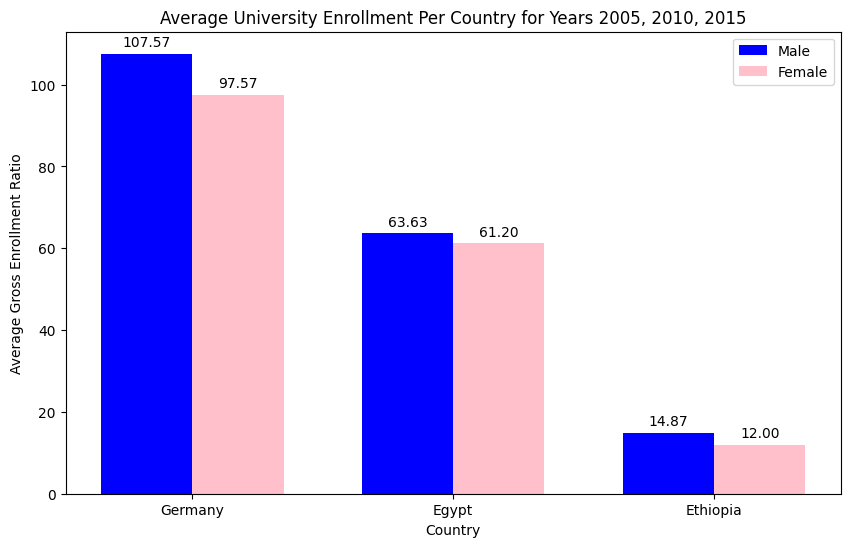

In [ ]:
countries = ['Germany', 'Egypt', 'Ethiopia']
n = len(countries)
index = np.arange(n)
bar_width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index, Total_Male_AVG_UppSec, bar_width, label='Male', color='blue')
bar2 = ax.bar(index + bar_width, Total_Female_AVG_UppSec, bar_width, label='Female', color='pink')


ax.set_title('Average University Enrollment Per Country for Years 2005, 2010, 2015')
ax.set_xlabel('Country')
ax.set_ylabel('Average Gross Enrollment Ratio')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(countries)
ax.legend()


for i, bar in enumerate(bar1):
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom')
for i, bar in enumerate(bar2):
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom')

plt.show()

In [ ]:
# Getting Male and Female Unemployment in each country

def get_Unemp_by_gender(data, country, years, series):
    unemployment_rate = []
    for year in years:
        value = data[(data['Country'] == country) &
                     (data['Series'] == series) &
                     (data['Year'] == year)]['Value'].values
        if value.size > 0:
            unemployment_rate.append(float(value[0]))
        else:
            unemployment_rate.append(np.nan)
    return np.array(unemployment_rate)


Germany_Unemp_Male = get_Unemp_by_gender(labor, "Germany", Years, 'Unemployment rate - Male')
Germany_Unemp_Female = get_Unemp_by_gender(labor, "Germany", Years, 'Unemployment rate - Female')

Egypt_Unemp_Male = get_Unemp_by_gender(labor, "Egypt", Years, 'Unemployment rate - Male')
Egypt_Unemp_Female = get_Unemp_by_gender(labor, "Egypt", Years, 'Unemployment rate - Female')

Ethiopia_Unemp_Male = get_Unemp_by_gender(labor, "Ethiopia", Years, 'Unemployment rate - Male')
Ethiopia_Unemp_Female = get_Unemp_by_gender(labor, "Ethiopia", Years, 'Unemployment rate - Female')


print("Germany Male Unemployment Rate:", Germany_Unemp_Male)
print("Germany Female Unemployment Rate:", Germany_Unemp_Female)
print("Egypt Male Unemployment Rate:", Egypt_Unemp_Male)
print("Egypt Female Unemployment Rate:", Egypt_Unemp_Female)
print("Ethiopia Male Unemployment Rate:", Ethiopia_Unemp_Male)
print("Ethiopia Female Unemployment Rate:", Ethiopia_Unemp_Female)


Germany Male Unemployment Rate: [11.4  7.4  5. ]
Germany Female Unemployment Rate: [10.9  6.5  4.2]
Egypt Male Unemployment Rate: [7.3 4.7 9.3]
Egypt Female Unemployment Rate: [24.9 21.9 24.6]
Ethiopia Male Unemployment Rate: [1.8 1.7 1.7]
Ethiopia Female Unemployment Rate: [3.3 3.1 3. ]


In [ ]:
Male_Total_Unemp = [Germany_Unemp_Male,Egypt_Unemp_Male, Ethiopia_Unemp_Male ]
Female_Total_Unemp = [Germany_Unemp_Female,Egypt_Unemp_Female,Egypt_Unemp_Female ]
Male_Total_Unemp = np.array(Male_Total_Unemp)
Female_Total_Unemp = np.array(Female_Total_Unemp)
print(Male_Total_Unemp)
print(Female_Total_Unemp)

[[11.4  7.4  5. ]
 [ 7.3  4.7  9.3]
 [ 1.8  1.7  1.7]]
[[10.9  6.5  4.2]
 [24.9 21.9 24.6]
 [24.9 21.9 24.6]]


In [ ]:
# Summarization for  variables for Question 2 Part 2 (INFLUENCED ALOT BY POPULATION !!!, MAY NOT BE BENEFICIAL OR REPRESENTATIVE)
Germany_AVG_Male_Unemp= Germany_Unemp_Male.mean()
Egypt_AVG_Male_Unemp = Egypt_Unemp_Male.mean()
Ethiopia_AVG_Male_Unemp = Ethiopia_Unemp_Male.mean()
print("Germany_AVG_Male_Unemp:", Germany_AVG_Male_Unemp)
print("Egypt_AVG_Male_Unemp:", Egypt_AVG_Male_Unemp )
print("Ethiopia_AVG_Male_Unemp:", Ethiopia_AVG_Male_Unemp)
print("\n")
Total_Male_AVG_Unemp = [Germany_AVG_Male_Unemp,Egypt_AVG_Male_Unemp, Ethiopia_AVG_Male_Unemp ]

Germany_AVG_Female_Unemp= Germany_Unemp_Female.mean()
Egypt_AVG_Female_Unemp = Egypt_Unemp_Female.mean()
Ethiopia_AVG_Female_Unemp = Ethiopia_Unemp_Female.mean()
print("Germany_AVG_Female_Unemp:", Germany_AVG_Female_Unemp)
print("Egypt_AVG_Female_Unemp:", Egypt_AVG_Female_Unemp )
print("Ethiopia_AVG_Female_Unemp:", Ethiopia_AVG_Female_Unemp)
Total_Female_AVG_Unemp = [Germany_AVG_Female_Unemp,Egypt_AVG_Female_Unemp, Ethiopia_AVG_Female_Unemp ]

Germany_AVG_Male_Unemp: 7.933333333333334
Egypt_AVG_Male_Unemp: 7.1000000000000005
Ethiopia_AVG_Male_Unemp: 1.7333333333333334


Germany_AVG_Female_Unemp: 7.199999999999999
Egypt_AVG_Female_Unemp: 23.8
Ethiopia_AVG_Female_Unemp: 3.1333333333333333


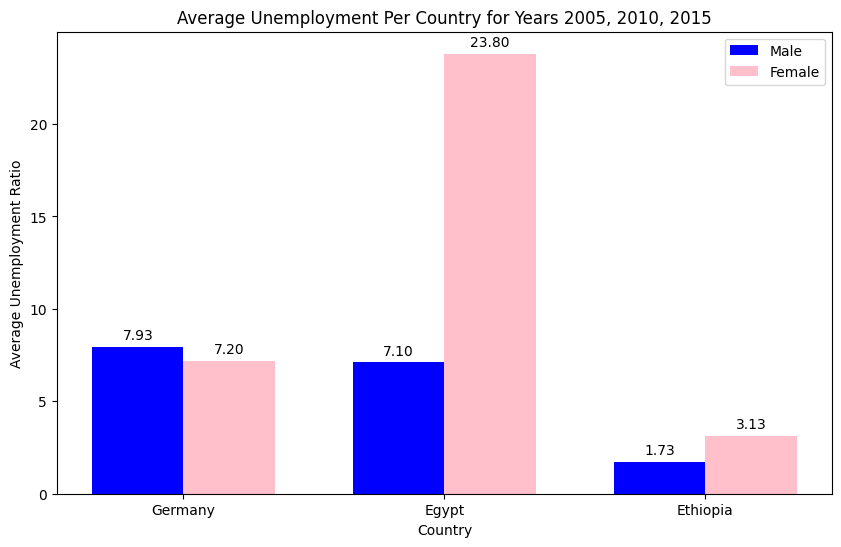

In [ ]:
countries = ['Germany', 'Egypt', 'Ethiopia']
n = len(countries)
index = np.arange(n)
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index, Total_Male_AVG_Unemp, bar_width, label='Male', color='blue')
bar2 = ax.bar(index + bar_width, Total_Female_AVG_Unemp, bar_width, label='Female', color='pink')

ax.set_title('Average Unemployment Per Country for Years 2005, 2010, 2015')
ax.set_xlabel('Country')
ax.set_ylabel('Average Unemployment Ratio')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(countries)
ax.legend()

for i, bar in enumerate(bar1):
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom')

for i, bar in enumerate(bar2):
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom')

In [ ]:
# Covariance of Male Unemployemnt and Male Upper secondary enrollement
Germany_Male_covariance_Enrollement_Unemp= np.cov(Germany_Unemp_Male,Germany_UppSec_Male)
Egypt_Male_covariance_Enrollement_Unemp= np.cov(Egypt_Unemp_Male,Egypt_UppSec_Male)
Ethiopia_Male_covariance_Enrollement_Unemp= np.cov(Ethiopia_Unemp_Male,Ethiopia_UppSec_Male)

print("Germany_Male_covariance_Enrollement_Unemp:", Germany_Male_covariance_Enrollement_Unemp)
print("Egypt_Male_covariance_Enrollement_Unemp:", Egypt_Male_covariance_Enrollement_Unemp)
print("Ethiopia_Male_covariance_Enrollement_Unemp:", Ethiopia_Male_covariance_Enrollement_Unemp)

Germany_Male_covariance_Enrollement_Unemp: [[10.45333333 -9.89333333]
 [-9.89333333 35.37333333]]
Egypt_Male_covariance_Enrollement_Unemp: [[  5.32        22.48      ]
 [ 22.48       152.36333333]]
Ethiopia_Male_covariance_Enrollement_Unemp: [[ 3.33333333e-03 -3.53333333e-01]
 [-3.53333333e-01  3.79433333e+01]]


In [ ]:
# Covariance of Female Unemployemnt and Female Upper secondary enrollement
Germany_Female_covariance_Enrollement_Unemp= np.cov(Germany_Unemp_Female,Germany_UppSec_Female)
Egypt_Female_covariance_Enrollement_Unemp= np.cov(Egypt_Unemp_Female,Egypt_UppSec_Female)
Ethiopia_Female_covariance_Enrollement_Unemp= np.cov(Ethiopia_Unemp_Female,Ethiopia_UppSec_Female)

print("Germany_Female_covariance_Enrollement_Unemp:", Germany_Female_covariance_Enrollement_Unemp)
print("Egypt_Female_covariance_Enrollement_Unemp:", Egypt_Female_covariance_Enrollement_Unemp)
print("Ethiopia_Female_covariance_Enrollement_Unemp:", Ethiopia_Female_covariance_Enrollement_Unemp)

Germany_Female_covariance_Enrollement_Unemp: [[11.59       -1.865     ]
 [-1.865       7.84333333]]
Egypt_Female_covariance_Enrollement_Unemp: [[  2.73   21.105]
 [ 21.105 163.87 ]]
Ethiopia_Female_covariance_Enrollement_Unemp: [[ 2.33333333e-02 -9.50000000e-01]
 [-9.50000000e-01  3.86800000e+01]]


In [ ]:
#Correlation for Question 2 Part 2 MALE
Q2_P2_MALE = pd.DataFrame({
   'Country': ['Germany', 'Egypt', 'Ethiopia'],
   'Male_Unemployment': [Germany_Unemp_Male, Egypt_Unemp_Male, Ethiopia_Unemp_Male],
   'Male_Upper_Secondary_Enrollment': [Germany_UppSec_Male, Germany_UppSec_Male, Germany_UppSec_Male]
})
correlations = []
for country in Q2_P2_MALE['Country']:
   Male_Unemployment = Q2_P2_MALE.loc[Q2_P2_MALE['Country'] == country, 'Male_Unemployment'].values[0]
   Male_Upper_Secondary_Enrollment = Q2_P2_MALE.loc[Q2_P2_MALE['Country'] == country, 'Male_Upper_Secondary_Enrollment'].values[0]
   corr = np.corrcoef(Male_Upper_Secondary_Enrollment, Male_Unemployment)[0, 1]
   correlations.append(corr)


Q2_P2_MALE['Correlation'] = correlations
print(Q2_P2_MALE)

    Country Male_Unemployment Male_Upper_Secondary_Enrollment  Correlation
0   Germany  [11.4, 7.4, 5.0]           [102.1, 113.9, 106.7]    -0.514490
1     Egypt   [7.3, 4.7, 9.3]           [102.1, 113.9, 106.7]    -0.663357
2  Ethiopia   [1.8, 1.7, 1.7]           [102.1, 113.9, 106.7]    -0.796004


In [ ]:
#Correlation for Question 2 Part 2 Female
Q2_P2_FEMALE = pd.DataFrame({
   'Country': ['Germany', 'Egypt', 'Ethiopia'],
   'Female_Unemployment': [Germany_Unemp_Female, Egypt_Unemp_Female, Ethiopia_Unemp_Female],
   'Female_Upper_Secondary_Enrollment': [Germany_UppSec_Female, Germany_UppSec_Female, Germany_UppSec_Female]
})
correlations = []
for country in Q2_P2_FEMALE['Country']:
   Female_Unemployment = Q2_P2_FEMALE.loc[Q2_P2_FEMALE['Country'] == country, 'Female_Unemployment'].values[0]
   Female_Upper_Secondary_Enrollment = Q2_P2_FEMALE.loc[Q2_P2_FEMALE['Country'] == country, 'Female_Upper_Secondary_Enrollment'].values[0]
   corr = np.corrcoef(Female_Upper_Secondary_Enrollment, Female_Unemployment)[0, 1]
   correlations.append(corr)


Q2_P2_FEMALE['Correlation'] = correlations
print(Q2_P2_FEMALE)

    Country Female_Unemployment Female_Upper_Secondary_Enrollment  Correlation
0   Germany    [10.9, 6.5, 4.2]               [95.9, 100.8, 96.0]    -0.195608
1     Egypt  [24.9, 21.9, 24.6]               [95.9, 100.8, 96.0]    -0.997333
2  Ethiopia     [3.3, 3.1, 3.0]               [95.9, 100.8, 96.0]    -0.206484


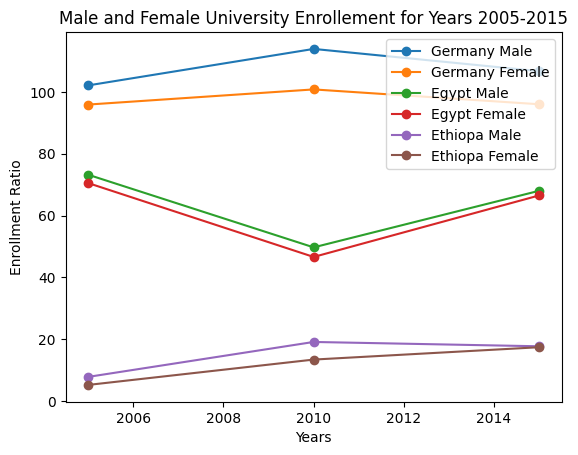

In [ ]:
plt.plot(Years, Germany_UppSec_Male, marker='o', label='Germany Male')
plt.plot(Years, Germany_UppSec_Female, marker='o', label='Germany Female')
plt.plot(Years, Egypt_UppSec_Male, marker='o', label= "Egypt Male")
plt.plot(Years, Egypt_UppSec_Female, marker='o', label='Egypt Female')
plt.plot(Years, Ethiopia_UppSec_Male, marker='o', label='Ethiopa Male')
plt.plot(Years, Ethiopia_UppSec_Female, marker='o', label='Ethiopa Female')
plt.xlabel("Years")
plt.ylabel("Enrollment Ratio")
plt.title("Male and Female University Enrollement for Years 2005-2015")
plt.legend()
plt.show()

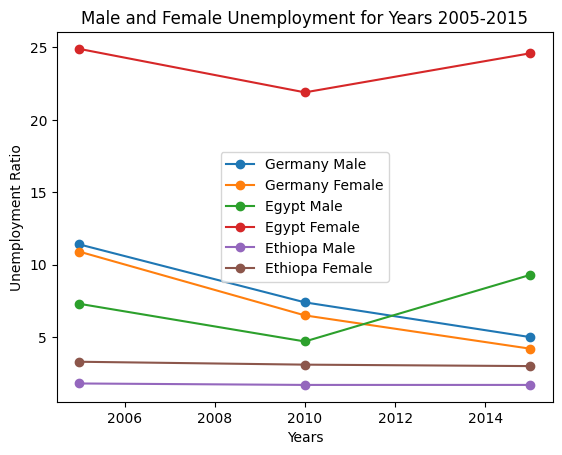

In [ ]:
plt.plot(Years, Germany_Unemp_Male, marker='o', label='Germany Male')
plt.plot(Years, Germany_Unemp_Female, marker='o', label='Germany Female')
plt.plot(Years, Egypt_Unemp_Male, marker='o', label= "Egypt Male")
plt.plot(Years, Egypt_Unemp_Female, marker='o', label='Egypt Female')
plt.plot(Years, Ethiopia_Unemp_Male, marker='o', label='Ethiopa Male')
plt.plot(Years, Ethiopia_Unemp_Female, marker='o', label='Ethiopa Female')
plt.xlabel("Years")
plt.ylabel("Unemployment Ratio")
plt.title("Male and Female Unemployment for Years 2005-2015")
plt.legend()
plt.show()

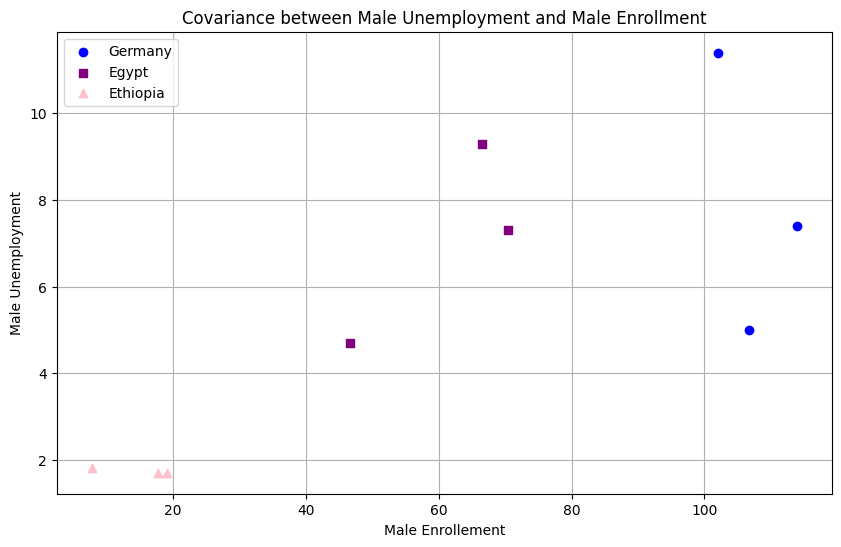

In [ ]:
def Covariance_Graph(x, y,CountryName, color, marker):
    plt.scatter(x, y, label = CountryName, color = color, marker = marker)
    plt.xlabel('Male Enrollement')
    plt.ylabel('Male Unemployment')
    plt.title('Covariance between Male Unemployment and Male Enrollment')
    plt.grid(True)

plt.figure(figsize=(10, 6))
Covariance_Graph(Germany_UppSec_Male, Germany_Unemp_Male, "Germany", "blue", 'o')
Covariance_Graph(Egypt_UppSec_Female,Egypt_Unemp_Male,  "Egypt", "purple",'s')
Covariance_Graph(Ethiopia_UppSec_Male, Ethiopia_Unemp_Male, "Ethiopia", "pink",'^')
plt.legend()
plt.show()

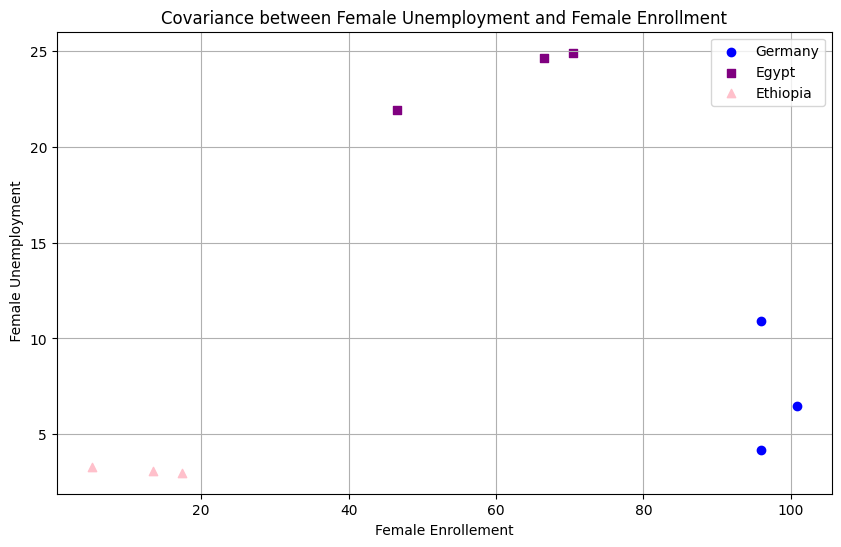

In [ ]:
def Covariance_Graph(x, y,CountryName, color, marker):
    plt.scatter(x, y, label = CountryName, color = color, marker = marker)
    plt.xlabel('Female Enrollement')
    plt.ylabel(' Female Unemployment')
    plt.title('Covariance between Female Unemployment and Female Enrollment')
    plt.grid(True)

plt.figure(figsize=(10, 6))
Covariance_Graph(Germany_UppSec_Female, Germany_Unemp_Female, "Germany", "blue",'o')
Covariance_Graph(Egypt_UppSec_Female,Egypt_Unemp_Female,  "Egypt", "purple", 's')
Covariance_Graph(Ethiopia_UppSec_Female, Ethiopia_Unemp_Female, "Ethiopia", "pink",'^')
plt.legend()
plt.show()

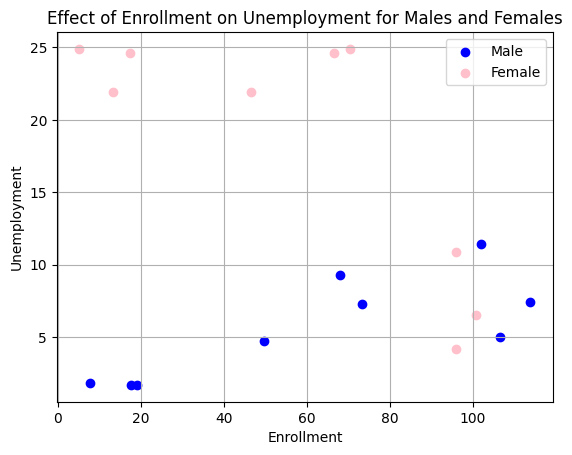

In [ ]:
# Effect on Enrollment on Unemployment for both genders
plt.scatter(Male_Total_Enrollement, Male_Total_Unemp, label = "Male", color='blue')
plt.scatter(Female_Total_Enrollement, Female_Total_Unemp, label = "Female", color='pink')
plt.xlabel("Enrollment")
plt.ylabel("Unemployment")
plt.title("Effect of Enrollment on Unemployment for Males and Females")
plt.grid(True)
plt.legend()

In [ ]:
Male_Total_Enrollement_1D = np.ravel(Male_Total_Enrollement)
Female_Total_Enrollement_1D = np.ravel(Female_Total_Enrollement)
Male_Total_Unemp_1D = np.ravel(Male_Total_Unemp)
Female_Total_Unemp_1D = np.ravel(Female_Total_Unemp)

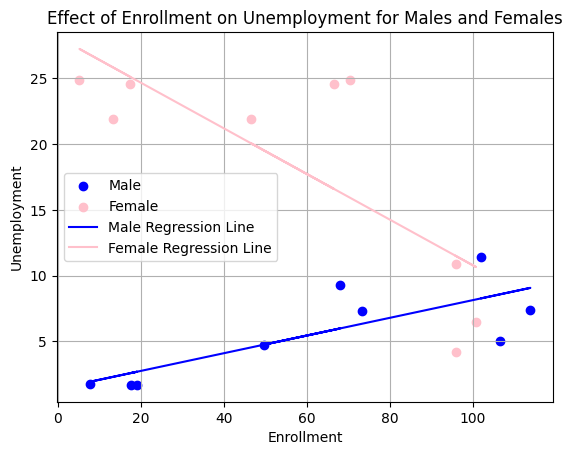

In [ ]:
# Regression
male_slope, male_intercept = np.polyfit(Male_Total_Enrollement_1D, Male_Total_Unemp_1D, 1)
female_slope, female_intercept = np.polyfit(Female_Total_Enrollement_1D, Female_Total_Unemp_1D, 1)
plt.scatter(Male_Total_Enrollement_1D, Male_Total_Unemp_1D, label="Male", color='blue')
plt.scatter(Female_Total_Enrollement_1D, Female_Total_Unemp_1D, label="Female", color='pink')
plt.plot(Male_Total_Enrollement_1D, male_slope * np.array(Male_Total_Enrollement_1D) + male_intercept, color='blue', label="Male Regression Line")
plt.plot(Female_Total_Enrollement_1D, female_slope * np.array(Female_Total_Enrollement_1D) + female_intercept, color='pink', label="Female Regression Line")

plt.xlabel("Enrollment")
plt.ylabel("Unemployment")
plt.title("Effect of Enrollment on Unemployment for Males and Females")
plt.grid(True)
plt.legend()
plt.show()

END OF QUESTION 2

START OF QUESTION 3

In [ ]:
# expenditure
expenditure1 = pd.read_excel("/content/Public expenditure on education.xls")
expenditure = expenditure1[expenditure1['Country'].isin(country_names)]
expenditure.head()

,Region/Country/Area,Country,Year,Series,Value
815,818,Egypt,2005,Public expenditure on education (% of GDP),4.8
816,818,Egypt,2010,Basic access to computers by level of educatio...,86.3
817,818,Egypt,2010,Basic access to computers by level of educatio...,98.0
818,818,Egypt,2010,Basic access to computers by level of educatio...,91.0
819,818,Egypt,2010,Public expenditure on education (% of GDP),3.5


In [ ]:
#Getting Expenditure for each country
expenditure_years = [2005,2010,2015,2017, 2018,2019, 2020]
def get_expenditure(data, country, years):
    expenditure_values = []
    for year in years:
        value = data[(data['Country'] == country) &
                     (data['Series'] == 'Public expenditure on education (% of GDP)') &
                     (data['Year'] == year)]['Value'].values
        if value.size > 0:
            expenditure_values.append(float(value[0]))
    return np.array(expenditure_values)

Germany_expenditure = get_expenditure(expenditure, 'Germany', expenditure_years)
Egypt_expenditure = get_expenditure(expenditure, 'Egypt', expenditure_years)
Ethiopia_expenditure = get_expenditure(expenditure, 'Ethiopia', expenditure_years)

print("Germany Education Expenditure (% of GDP):", Germany_expenditure)
print("Egypt Education Expenditure (% of GDP):", Egypt_expenditure)
print("Ethiopia Education Expenditure (% of GDP):", Ethiopia_expenditure)


Germany Education Expenditure (% of GDP): [4.9 4.9 5. ]
Egypt Education Expenditure (% of GDP): [4.8 3.5 3.9]
Ethiopia Education Expenditure (% of GDP): [4.5 4.7 5.1]


In [ ]:
#Summarizing
AVG_Expenditure_Germany = Germany_expenditure.mean()
AVG_Expenditure_Egypt = Egypt_expenditure.mean()
AVG_Expenditure_Ethiopia = Ethiopia_expenditure.mean()
print(AVG_Expenditure_Germany)
print(AVG_Expenditure_Egypt)
print(AVG_Expenditure_Ethiopia)

4.933333333333334
4.066666666666667
4.766666666666667


In [ ]:
#Variance of Public Expenditure
Germany_expenditure_variance = np.var(Germany_expenditure)
Egypt_expenditure_variance = np.var(Egypt_expenditure)
Ethiopia_expenditure_variance = np.var(Ethiopia_expenditure)
print(Germany_expenditure_variance)
print(Egypt_expenditure_variance)
print(Ethiopia_expenditure_variance)


0.0022222222222222066
0.29555555555555546
0.062222222222222144


In [ ]:
#Covariance of expenditure and enrollement
Germany_covariance_Enrollement_Expenditure= np.cov(Germany_expenditure,Germany_UppSecondary)
Egypt_covariance_Enrollement_Expenditure= np.cov(Egypt_expenditure,Egypt_UppSecondary)
Ethiopia_covariance_Enrollement_Expenditure= np.cov(Ethiopia_expenditure,Egypt_UppSecondary)

print("Germany_covariance_Enrollement_Expenditure:")
print(Germany_covariance_Enrollement_Expenditure)
print("Egypt_covariance_Enrollement_Expenditure:")
print(Egypt_covariance_Enrollement_Expenditure)
print("Ethiopia_covariance_Enrollement_Expenditure:")
print(Ethiopia_covariance_Enrollement_Expenditure)

Germany_covariance_Enrollement_Expenditure:
[[ 3.33333333e-03 -7.40000000e+00]
 [-7.40000000e+00  1.84530000e+04]]
Egypt_covariance_Enrollement_Expenditure:
[[4.43333333e-01 3.99566667e+02]
 [3.99566667e+02 4.80361333e+05]]
Ethiopia_covariance_Enrollement_Expenditure:
[[ 9.33333333e-02 -5.93333333e+00]
 [-5.93333333e+00  4.80361333e+05]]


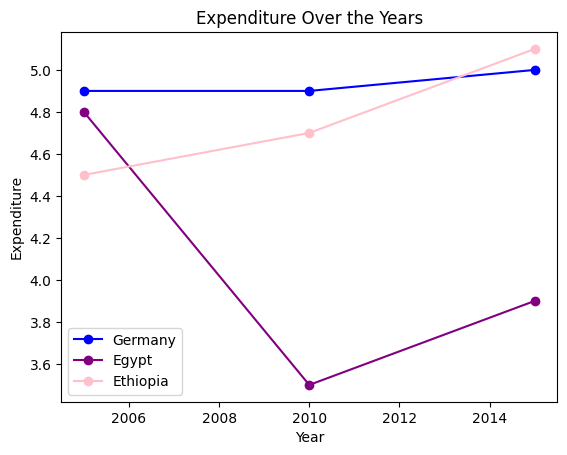

In [ ]:
# Graphs for question 4
plt.plot(Years, Germany_expenditure, marker='o', label='Germany', color='blue')
plt.plot(Years, Egypt_expenditure, marker='o', label='Egypt', color='purple')
plt.plot(Years, Ethiopia_expenditure, marker='o', label='Ethiopia', color='pink')

plt.title("Expenditure Over the Years")
plt.xlabel("Year")
plt.ylabel("Expenditure")
plt.legend()
plt.show()

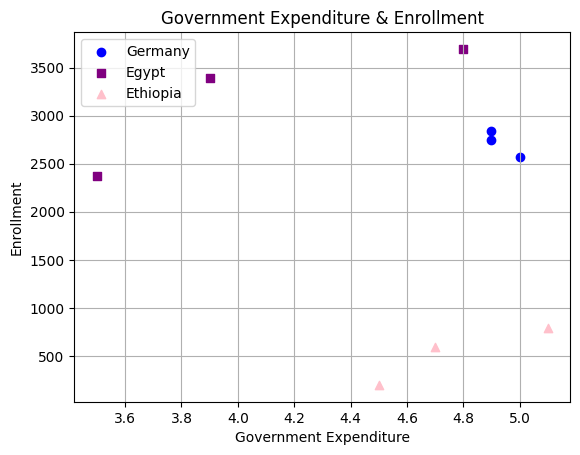

In [ ]:
Germany_covariance = Germany_covariance_Enrollement_Expenditure[1][0]
Egypt_covariance = Egypt_covariance_Enrollement_Expenditure[1][0]
Ethiopia_covariance = Ethiopia_covariance_Enrollement_Expenditure[1][0]

plt.scatter(Germany_expenditure, Germany_UppSecondary, label= "Germany", color='blue', marker='o')
plt.scatter(Egypt_expenditure, Egypt_UppSecondary, label='Egypt', color='purple', marker='s')
plt.scatter(Ethiopia_expenditure, Ethiopia_UppSecondary, label= 'Ethiopia', color='pink', marker='^')

plt.xlabel('Government Expenditure')
plt.ylabel('Enrollment')
plt.title('Government Expenditure & Enrollment')
plt.legend()
plt.grid(True)
plt.show()


END OF QUESTION 3